# Titanic Practice

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [40]:
titanic_train = pd.read_csv('../train.csv')
# titanic_test = pd.read_csv('../test.csv')
# we will use the training set as our full data set to 
# implement the steps of splitting data

In [41]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [71]:
# create age buckets for data vis
bins = [0, 20, 30, 40, 50, 120]
labels = ['0-20', '20-29', '30-39', '40-49','50+']
titanic_train['agerange'] = pd.cut(titanic_train.Age, bins, labels = labels,include_lowest = True)
titanic_train['agerange'] = titanic_train['agerange'].replace(np.nan, 'No Age', regex=True)
titanic_train.groupby('agerange')['PassengerId'].count()

agerange
0-20      179
20-29     230
30-39     155
40-49      86
50+        64
No Age    177
Name: PassengerId, dtype: int64

## Data Vis

Text(0, 0.5, 'Survival')

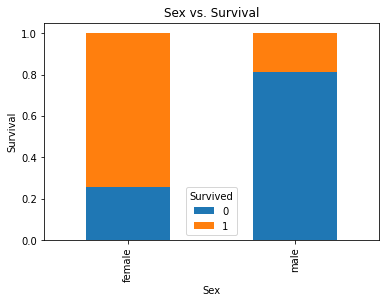

In [51]:
table=pd.crosstab(titanic_train.Sex,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sex vs. Survival')
plt.xlabel('Sex')
plt.ylabel('Survival')

Text(0, 0.5, 'Survival')

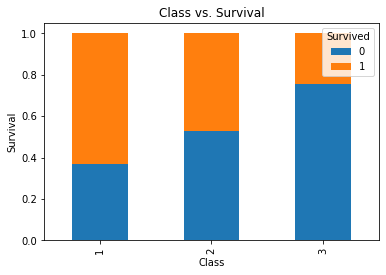

In [55]:
table=pd.crosstab(titanic_train.Pclass,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Class vs. Survival')
plt.xlabel('Class')
plt.ylabel('Survival')

Text(0, 0.5, 'Survival')

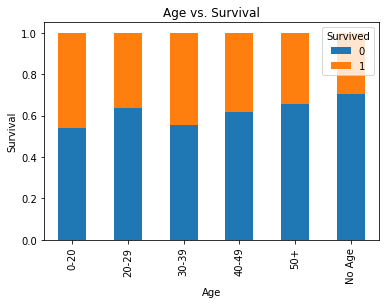

In [72]:
table=pd.crosstab(titanic_train.agerange,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survival')

Text(0, 0.5, 'Survival')

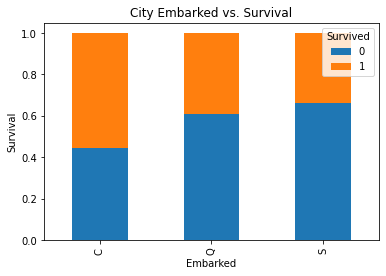

In [56]:
table=pd.crosstab(titanic_train.Embarked,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('City Embarked vs. Survival')
plt.xlabel('Embarked')
plt.ylabel('Survival')

Text(0, 0.5, 'Survival')

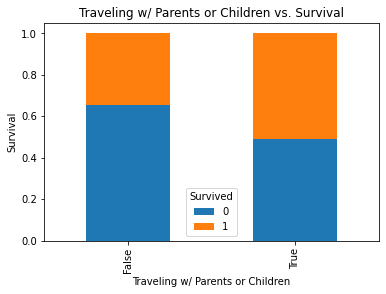

In [57]:
table=pd.crosstab(titanic_train.Parch>0,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Traveling w/ Parents or Children vs. Survival')
plt.xlabel('Traveling w/ Parents or Children')
plt.ylabel('Survival')

Text(0, 0.5, 'Survival')

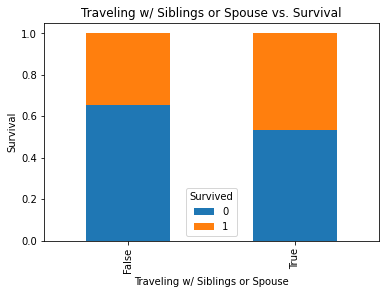

In [54]:
table=pd.crosstab(titanic_train.SibSp>0,titanic_train.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Traveling w/ Siblings or Spouse vs. Survival')
plt.xlabel('Traveling w/ Siblings or Spouse')
plt.ylabel('Survival')

## Pre-Process Data

#### Deal with missing age

In [73]:
# Deal with missing age by tacking average age by class / sex and joining 
avg_ages = titanic_train.groupby(['Sex', 'Pclass'])['Age'].mean().reset_index()
print(avg_ages)

      Sex  Pclass        Age
0  female       1  34.611765
1  female       2  28.722973
2  female       3  21.750000
3    male       1  41.281386
4    male       2  30.740707
5    male       3  26.507589


In [82]:
# merge avg age to titanic_train
titanic_train2 = pd.merge(titanic_train, avg_ages,  how='left', left_on=['Sex','Pclass'], right_on = ['Sex','Pclass'])
titanic_train2[['Age_x','Age_y']].head(10)

,Age_x,Age_y
0,22.0,26.507589
1,38.0,34.611765
2,26.0,21.750000
3,35.0,34.611765
4,35.0,26.507589
5,NaN,26.507589
6,54.0,41.281386
7,2.0,26.507589
8,27.0,21.750000
9,14.0,28.722973


In [83]:
# fill in missing age with estimated age
titanic_train2['Age_x'][np.isnan(titanic_train2['Age_x']).values] = titanic_train2['Age_y'][np.isnan(titanic_train2['Age_x']).values]

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### create categorical variables

In [84]:
titanic_train2['SibSp2'] = titanic_train2['SibSp'] > 0
titanic_train2['Parch2'] = titanic_train2['Parch'] > 0

In [85]:
# encode categorial variables here
titanic_train2 = pd.get_dummies(titanic_train2, columns=['Sex', 'Pclass', 'Parch2', 'SibSp2', 'agerange'], prefix = ['Sex', 'Class', 'Parch', 'SibSp', 'AgeRange'])

In [86]:
titanic_train2.shape

(891, 26)

In [87]:
titanic_train2.head(10)

,PassengerId,Survived,Name,Age_x,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Parch_False,Parch_True,SibSp_False,SibSp_True,AgeRange_0-20,AgeRange_20-29,AgeRange_30-39,AgeRange_40-49,AgeRange_50+,AgeRange_No Age
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,S,...,1,0,0,1,0,1,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,...,1,0,0,1,0,0,1,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,...,1,0,1,0,0,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,...,1,0,0,1,0,0,1,0,0,0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,S,...,1,0,1,0,0,0,1,0,0,0
5,6,0,"Moran, Mr. James",26.507589,0,0,330877,8.4583,NaN,Q,...,1,0,1,0,0,0,0,0,0,1
6,7,0,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,E46,S,...,1,0,1,0,0,0,0,0,1,0
7,8,0,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,NaN,S,...,0,1,0,1,1,0,0,0,0,0
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,NaN,S,...,0,1,1,0,0,1,0,0,0,0
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,NaN,C,...,1,0,0,1,1,0,0,0,0,0


In [127]:
list(titanic_train2.columns)

['PassengerId',
 'Survived',
 'Name',
 'Age_x',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_y',
 'Sex_female',
 'Sex_male',
 'Class_1',
 'Class_2',
 'Class_3',
 'Parch_False',
 'Parch_True',
 'SibSp_False',
 'SibSp_True',
 'AgeRange_0-20',
 'AgeRange_20-29',
 'AgeRange_30-39',
 'AgeRange_40-49',
 'AgeRange_50+',
 'AgeRange_No Age']

In [147]:
#dataset = titanic_train2[['Class_1', 'Class_2', 'Sex_male', 'Parch_True', 'SibSp_True','Age_x', 'Fare', 'Survived']]
dataset = titanic_train2[['Class_1', 'Class_2', 'Sex_male', 'Parch_True', 'SibSp_True', 'AgeRange_20-29', 
                          'AgeRange_30-39','AgeRange_40-49', 'AgeRange_50+', 'AgeRange_No Age', 'Fare', 'Survived']]

In [148]:
print(dataset)

     Class_1  Class_2  Sex_male  Parch_True  SibSp_True  AgeRange_20-29  \
0          0        0         1           0           1               1   
1          1        0         0           0           1               0   
2          0        0         0           0           0               1   
3          1        0         0           0           1               0   
4          0        0         1           0           0               0   
..       ...      ...       ...         ...         ...             ...   
886        0        1         1           0           0               1   
887        1        0         0           0           0               0   
888        0        0         0           1           1               0   
889        1        0         1           0           0               1   
890        0        0         1           0           0               0   

     AgeRange_30-39  AgeRange_40-49  AgeRange_50+  AgeRange_No Age     Fare  \
0                 0 

## Deal with missing data

In [105]:
# Count total NaN at each column in a DataFrame 
# No longer necessary!
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      dataset.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 Class_1       0
Class_2       0
Sex_male      0
Parch_True    0
SibSp_True    0
Age_x         0
Fare          0
Survived      0
dtype: int64


## Split into X and y

In [151]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [107]:
print(X)

     Class_1  Class_2  Sex_male  Parch_True  SibSp_True  Age_x     Fare
0          0        0         1           0           1  22.00   7.2500
1          1        0         0           0           1  38.00  71.2833
2          0        0         0           0           0  26.00   7.9250
3          1        0         0           0           1  35.00  53.1000
4          0        0         1           0           0  35.00   8.0500
..       ...      ...       ...         ...         ...    ...      ...
886        0        1         1           0           0  27.00  13.0000
887        1        0         0           0           0  19.00  30.0000
888        0        0         0           1           1  21.75  23.4500
889        1        0         1           0           0  26.00  30.0000
890        0        0         1           0           0  32.00   7.7500

[891 rows x 7 columns]


In [100]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Split Data into Train and Test

In [152]:
from sklearn.model_selection import train_test_split
X=X.values
y=y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Scale Variables

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# only transform age and fare, not categorical variables!
X_train[:,10:] = sc.fit_transform(X_train[:,10:])
X_test[:,10:] = sc.transform(X_test[:,10:])

In [154]:
print(X_train)

[[ 0.          0.          1.         ...  0.          1.
  -0.18801432]
 [ 1.          0.          0.         ...  0.          0.
   0.53969044]
 [ 0.          1.          0.         ...  0.          0.
  -0.46350293]
 ...
 [ 0.          1.          1.         ...  0.          0.
   0.89773487]
 [ 0.          0.          0.         ...  0.          1.
  -0.52724343]
 [ 0.          0.          1.         ...  0.          0.
  -0.51643995]]


In [111]:
print(X_test)

[[ 1.          0.          0.         ...  0.          1.34864039
  -0.13012499]
 [ 0.          0.          1.         ...  0.         -0.23667089
  -0.51977174]
 [ 0.          1.          0.         ...  0.         -0.93796437
  -0.46350293]
 ...
 [ 0.          0.          1.         ...  0.         -0.23667089
  -0.52328287]
 [ 0.          0.          1.         ...  0.         -0.6429186
  -0.52328287]
 [ 0.          0.          0.         ...  1.         -1.8231017
  -0.27426278]]


## Train Classification Models

In [155]:
# import packages from machine learning course
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [156]:
# logistic regression
classifier_logistic = LogisticRegression(random_state = 0)
classifier_logistic.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [157]:
# k nearest neighbors
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [159]:
# support vector machine linear kernal
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [158]:
# support vector machine non-linear kernal
classifier_svm2 = SVC(kernel = 'rbf', random_state = 0)
classifier_svm2.fit(X_train, y_train)

SVC(random_state=0)

In [160]:
# decision tree
classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [161]:
# random forest
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [162]:
# naive bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

##  Accuracy on test set?

In [32]:
# import packages
from sklearn.metrics import confusion_matrix, accuracy_score

In [163]:
y_pred = classifier_logistic.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92 14]
 [30 43]]


0.7541899441340782

In [164]:
y_pred = classifier_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[91 15]
 [32 41]]


0.7374301675977654

In [165]:
y_pred = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90 16]
 [24 49]]


0.776536312849162

In [166]:
y_pred = classifier_svm2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[92 14]
 [27 46]]


0.770949720670391

In [167]:
y_pred = classifier_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90 16]
 [33 40]]


0.7262569832402235

In [168]:
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85 21]
 [32 41]]


0.7039106145251397

In [169]:
y_pred = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[89 17]
 [33 40]]


0.7206703910614525

Doing bad now.

## NEURAL NET TIME

In [171]:
# load packages
import tensorflow as tf

In [172]:
# initialize ann
ann = tf.keras.models.Sequential()

In [191]:
# ADD ALL THE LAYERS
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [192]:
# compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [193]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Train on 712 samples
Epoch 1/100
712/712 [==============================] - 1s 1ms/sample - loss: 0.6851 - accuracy: 0.8258
Epoch 2/100
712/712 [==============================] - 0s 57us/sample - loss: 0.6717 - accuracy: 0.8371
Epoch 3/100
712/712 [==============================] - 0s 58us/sample - loss: 0.6541 - accuracy: 0.8371
Epoch 4/100
712/712 [==============================] - 0s 57us/sample - loss: 0.6300 - accuracy: 0.8455
Epoch 5/100
712/712 [==============================] - 0s 55us/sample - loss: 0.5920 - accuracy: 0.8469
Epoch 6/100
712/712 [==============================] - 0s 52us/sample - loss: 0.5401 - accuracy: 0.8469
Epoch 7/100
712/712 [==============================] - 0s 53us/sample - loss: 0.4862 - accuracy: 0.8441
Epoch 8/100
712/712 [==============================] - 0s 54us/sample - loss: 0.4425 - accuracy: 0.8469
Epoch 9/100
712/712 [==============================] - 0s 53us/sample - loss: 0.4131 - accuracy: 0.8553
Epoch 10/100
712/712 [======================

712/712 [==============================] - 0s 54us/sample - loss: 0.3702 - accuracy: 0.8652
Epoch 79/100
712/712 [==============================] - 0s 53us/sample - loss: 0.3691 - accuracy: 0.8624
Epoch 80/100
712/712 [==============================] - 0s 52us/sample - loss: 0.3695 - accuracy: 0.8638
Epoch 81/100
712/712 [==============================] - 0s 54us/sample - loss: 0.3694 - accuracy: 0.8610
Epoch 82/100
712/712 [==============================] - 0s 55us/sample - loss: 0.3680 - accuracy: 0.8624
Epoch 83/100
712/712 [==============================] - 0s 53us/sample - loss: 0.3685 - accuracy: 0.8638
Epoch 84/100
712/712 [==============================] - 0s 56us/sample - loss: 0.3688 - accuracy: 0.8666
Epoch 85/100
712/712 [==============================] - 0s 56us/sample - loss: 0.3671 - accuracy: 0.8652
Epoch 86/100
712/712 [==============================] - 0s 53us/sample - loss: 0.3683 - accuracy: 0.8638
Epoch 87/100
712/712 [==============================] - 0s 54us/samp

In [200]:
# predictions on test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]

In [201]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[89 17]
 [33 40]]


0.7206703910614525